<a href="https://colab.research.google.com/github/AlexKressner/Statistik/blob/main/Wahrscheinlichkeitsrechnung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
number_of_trials = 1000
heads = 0
tails = 0
ratio = []
p = 0.5

In [3]:
for trial in range(1,number_of_trials+1):
  result = bernoulli.rvs(p)
  if result == 1:
    heads +=1
  else:
    tails +=1
  ratio.append([trial,heads/trial])

In [4]:
heads, tails

(476, 524)

In [5]:
y = [point[1] for point in ratio]
x = [point[0] for point in ratio]

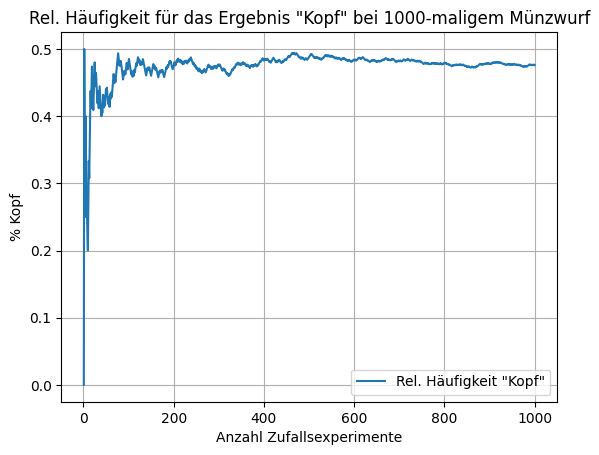

In [6]:
# Plot the line
plt.plot(x, y, label='Rel. Häufigkeit "Kopf"')

# Add title and labels to the axes
plt.title(f'Rel. Häufigkeit für das Ergebnis "Kopf" bei {number_of_trials}-maligem Münzwurf')
plt.xlabel("Anzahl Zufallsexperimente")
plt.ylabel("% Kopf")

# Display the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Anzahl der Stichproben und Fehlerwahrscheinlichkeit

In [7]:
trials = range(0,79)

In [8]:
p = []
prob=[]
for trial in trials:
  p.append((68-trial)/(80-trial))
  prob.append([trial+1,np.prod(p)])

In [9]:
x = pd.DataFrame(prob, columns=["Trial","Irrtumswahrscheinlichkeit"])
x

,Trial,Irrtumswahrscheinlichkeit
0,1,0.850000
1,2,0.720886
2,3,0.609981
3,4,0.514919
4,5,0.433616
...,...,...
74,75,0.000000
75,76,-0.000000
76,77,0.000000
77,78,-0.000000


<Axes: xlabel='Trial'>

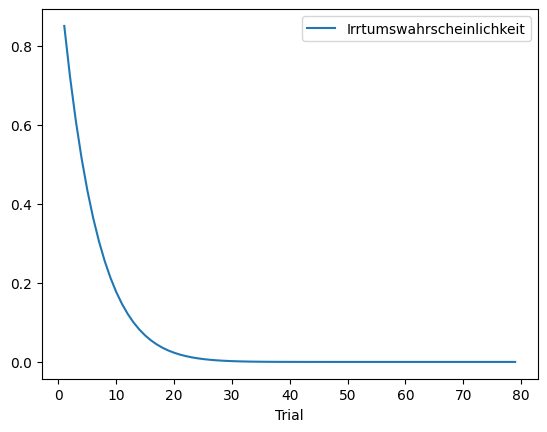

In [10]:
x.plot(x="Trial", y="Irrtumswahrscheinlichkeit", kind="line")

## Binomialverteilung

In [11]:
import scipy
import numpy as np

### Beispiel "Münzwurf"

In [12]:
N=10 # Anzahl der Experimente
k=4 # Anzahl Erfolge (Kopf)
p=0.5 # Erfolgswahrscheinlichkeit

In [13]:
scipy.stats.binom.pmf(k,N,p)

np.float64(0.2050781249999999)

In [14]:
np.sum(scipy.stats.binom.pmf(0,N,p)+scipy.stats.binom.pmf(1,N,p)+scipy.stats.binom.pmf(2,N,p)+scipy.stats.binom.pmf(3,N,p)+scipy.stats.binom.pmf(4,N,p))

np.float64(0.37695312499999994)

In [15]:
scipy.stats.binom.cdf(k,N,p)

np.float64(0.376953125)

In [16]:
l = []
for k in range(N+1):
  l.append([k,scipy.stats.binom.pmf(k,N,p)])

In [17]:
l

[[0, np.float64(0.0009765624999999989)],
 [1, np.float64(0.009765625000000002)],
 [2, np.float64(0.04394531250000004)],
 [3, np.float64(0.1171875)],
 [4, np.float64(0.2050781249999999)],
 [5, np.float64(0.24609375000000003)],
 [6, np.float64(0.2050781249999999)],
 [7, np.float64(0.11718749999999999)],
 [8, np.float64(0.04394531250000004)],
 [9, np.float64(0.009765625000000002)],
 [10, np.float64(0.0009765625)]]

In [18]:
x = pd.DataFrame(l, columns=["k","Wahrscheinlichkeit"])

<Axes: xlabel='k'>

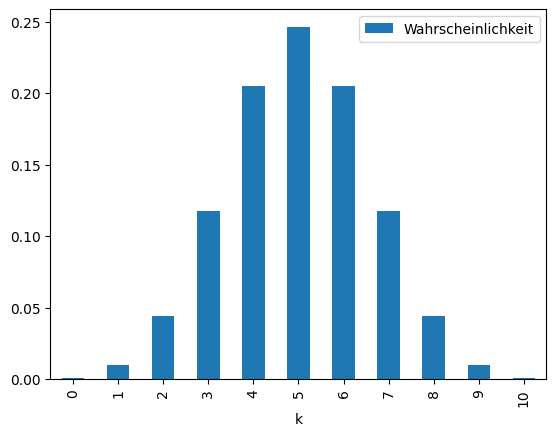

In [19]:
x.plot(x="k", y="Wahrscheinlichkeit", kind="bar")

### Beispiel Flugzeugmotor

In [20]:
N=4 # Anzahl Motoren
p=0.95 # Wahrscheinlichkeit Motor funktioniert problemlos

In [21]:
scipy.stats.binom.pmf(2,N,p)+scipy.stats.binom.pmf(3,N,p)+scipy.stats.binom.pmf(4,N,p)

np.float64(0.9995187500000002)

In [22]:
probs = []

In [23]:
for p in range(1,100):
  prob = p/100
  prob = np.sum(scipy.stats.binom.pmf(2,N,prob)+scipy.stats.binom.pmf(3,N,prob)+scipy.stats.binom.pmf(4,N,prob))
  probs.append([p/100, prob])

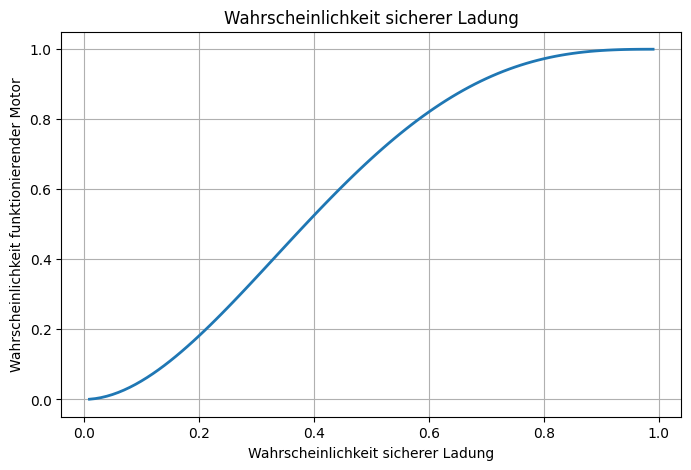

In [24]:
probs = np.array(probs)
# Plot
plt.figure(figsize=(8,5))
plt.plot(probs[:,0], probs[:,1], lw=2)
plt.title("Wahrscheinlichkeit sicherer Ladung")
plt.xlabel("Wahrscheinlichkeit sicherer Ladung")
plt.ylabel("Wahrscheinlichkeit funktionierender Motor")
plt.grid(True)
plt.show()

### Multinomialverteilung

In [25]:
scipy.stats.multinomial.pmf([3,2,3,2],10,[0.2,0.2,0.2,0.4])

np.float64(0.010321920000000021)

## Zentraler Grenzwertsatz

In [26]:
num_trials = 1000 # Anzahl Zufallsexperimente
num_rv = 25 # Anzahl Zufallsvariablen

In [27]:
# Parameter Exponentialverteilung
s = 1.0

In [28]:
# Parameter Betaverteilung
a = 1
b = 5

In [29]:
expo_sample_sum = []
beta_sample_sum = []

In [30]:
for trial in range(num_trials):
  expo_sample_sum.append([trial, np.sum(scipy.stats.expon.rvs(N,p,size=num_rv))])
  beta_sample_sum.append([trial, np.sum(scipy.stats.beta.rvs(a,b,size=num_rv))])

In [31]:
expo = pd.DataFrame(expo_sample_sum, columns=["Trial","Summe"])
beta = pd.DataFrame(beta_sample_sum, columns=["Trial","Summe"])

<Axes: ylabel='Frequency'>

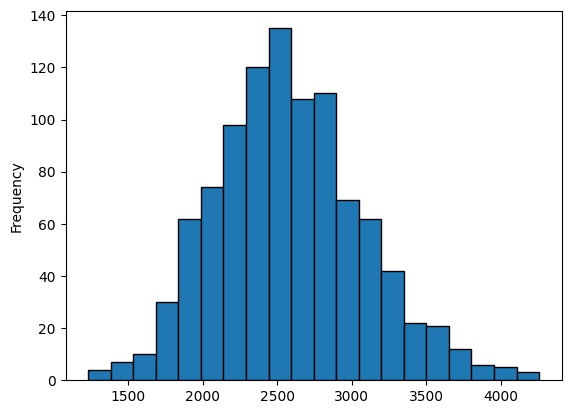

In [32]:
expo["Summe"].plot(kind="hist", edgecolor="black", bins=20)

<Axes: ylabel='Frequency'>

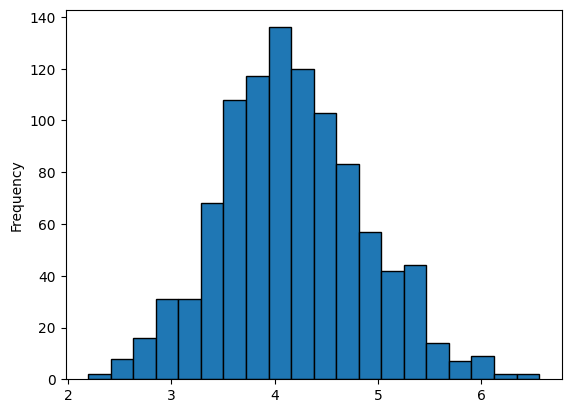

In [33]:
beta["Summe"].plot(kind="hist", edgecolor="black", bins=20)

## Beispiel Qualitätskontrolle
Sei $Y$ der Durchmesser ein Schraube mit $Y\sim N(\mu,σ^2)$

In [34]:
mue = 5
sigma = 0.1

In [35]:
lower = 4.9
upper = 5.1

In [36]:
# Wahrscheinlichkeit P(Y<=4,9)
prob_lower = scipy.stats.norm.cdf(lower, mue, sigma)

In [37]:
# Wahrscheinlichkeit P(Y<=5,1)
prob_upper = scipy.stats.norm.cdf(upper, mue, sigma)

In [38]:
# Wahrscheinlichkeit P(4,9<Y<=5,1)
prob_upper - prob_lower

np.float64(0.6826894921370843)

In [39]:
# Finde den Durchmesser, unter dem 95% aller Schrauben liegen, d.h. 95%-Quantil, F^(-1)(0,95)
scipy.stats.norm.ppf(0.95,mue,sigma)
#bzw.
mue + sigma*scipy.stats.norm.ppf(0.95,0,1)

np.float64(5.164485362695148)

## Beispiel Bestandsmanagement

In [40]:
mue = 100
sigma = 20

In [41]:
inventory = []

In [42]:
for sl in range(5000,9999):
  sl = sl/10000
  inventory.append([sl,scipy.stats.norm.ppf(sl, mue, sigma)])

In [43]:
inventory = pd.DataFrame(inventory, columns=["ServiceLevel","Bestand"])

<Axes: xlabel='ServiceLevel'>

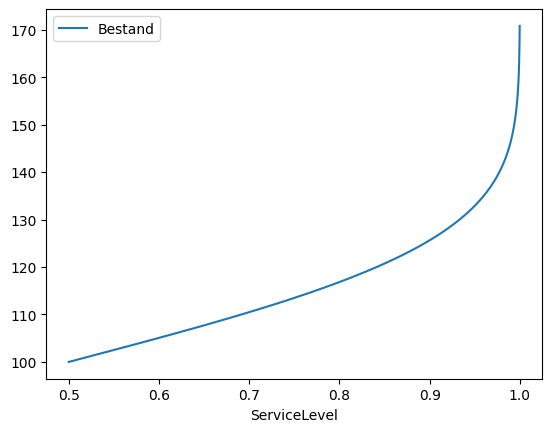

In [44]:
inventory.plot(x="ServiceLevel", y="Bestand", kind="line")

In [45]:
mue = 86.25
sigma = 36.224

In [46]:
servicelevel = []

In [47]:
for b in range(50,250):
  servicelevel.append([b,scipy.stats.norm.cdf(b, mue, sigma)])

In [48]:
servicelevel = pd.DataFrame(servicelevel, columns=["Bestand","ServiceLevel"])

<Axes: xlabel='Bestand'>

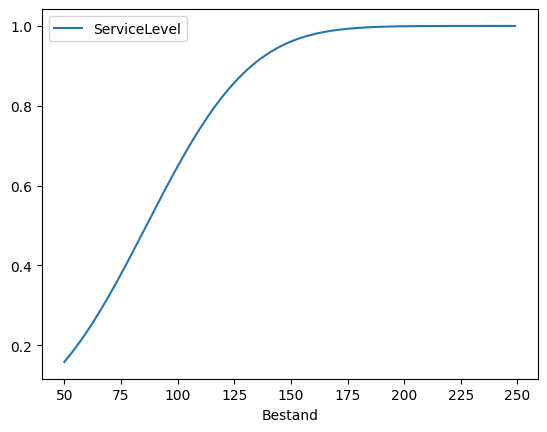

In [49]:
servicelevel.plot(y="ServiceLevel", x="Bestand", kind="line")

## **Exkurs: Bayes Schätzer**

## **Prior** zum Münzwurf, **$P(θ)$**, Modellierung über Betaverteilung

In [50]:
import scipy

In [59]:
# Verteilungsparameter der Betaverteilung
# Über die Wahl der Parameter drücken wir unser aktuelles Wissen zum Ausgang des Zufallsexperiments aus bevor wir die Daten beobachten
a = 2 # Anzahl Kopf
b = 2 # Anzahl Zahl

In [60]:
p = np.arange(1,999)/1000 #x

In [61]:
prior = scipy.stats.beta.pdf(p, a, b) #f(x)

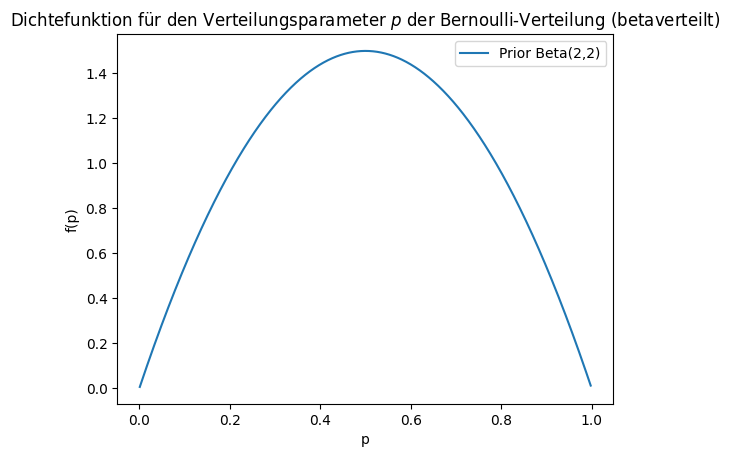

In [62]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    p,
    prior,
    ms=1,
    label=f"Prior Beta({a},{b})"
    )
ax.set_title('Dichtefunktion für den Verteilungsparameter $p$ der Bernoulli-Verteilung (betaverteilt)')
ax.set_xlabel('p')
ax.set_ylabel('f(p)')
ax.legend()
plt.show()

## **Likelihood Funktion** zum Münzwurf, **$P(D|θ)$**, Modellierung über Bernoulliverteilung

In [63]:
# Wir nehmen an, dass die realisierten Daten die folgenden sind:
N_Kopf = 3
N_Zahl = 0

In [64]:
llh = scipy.stats.bernoulli.pmf(1,p)**N_Kopf * (1-scipy.stats.bernoulli.pmf(1,p))**N_Zahl

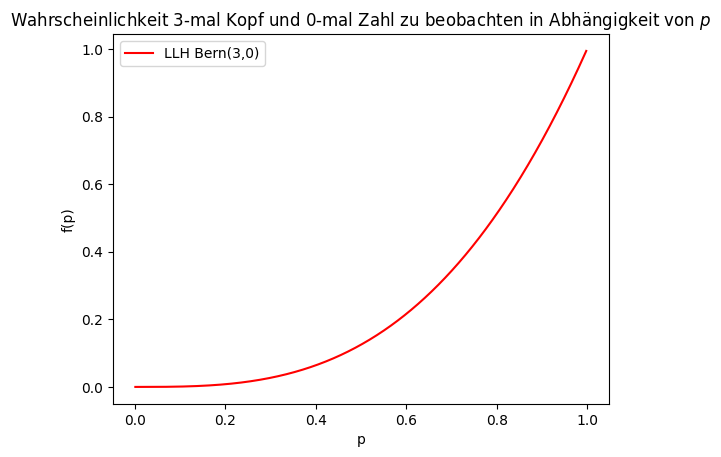

In [65]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    p,
    llh,
    ms=1,
    label=f"LLH Bern({N_Kopf},{N_Zahl})",
    color="red"
    )
ax.set_title(f"Wahrscheinlichkeit {N_Kopf}-mal Kopf und {N_Zahl}-mal Zahl zu beobachten in Abhängigkeit von $p$")
ax.set_xlabel('p')
ax.set_ylabel('f(p)')
ax.legend()
plt.show()

## **Posterior** zum Münzwurf, **$P(θ|D)$**$=\frac{P(D|θ)P(θ)}{P(D)}$

In [66]:
p_D = (llh*prior).sum()

In [68]:
posterior = llh * prior / p_D

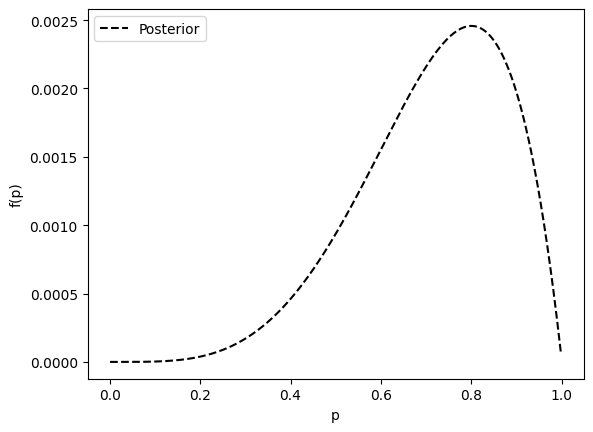

In [69]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    p,
    posterior,
    ms=1,
    label="Posterior",
    color="black",
    linestyle='--'
    )
ax.set_xlabel('p')
ax.set_ylabel('f(p)')
ax.legend()
plt.show()

### **Posterior mode**, $\hat{θ}=\text{arg max}_θ P(θ|D)$

In [70]:
p[posterior.argmax()]

np.float64(0.8)

### **Posterior mean**, $E[θ|D] = \int θ P(θ|D)P \mathrm{d}θ$

In [71]:
(p * posterior).sum()

np.float64(0.7142764923887504)

### **Posterior Prediction**,
$P(y=1|D)=\int_{0}^{1}P(y=1|θ)P(θ|D)\mathrm{d}θ$ für Zahl und

$P(y=0|D)=\int_{0}^{1}P(y=0|θ)P(θ|D)\mathrm{d}θ$ für Kopf

In [72]:
(scipy.stats.bernoulli.pmf(1, p) * posterior).sum()

np.float64(0.7142764923887504)

In [73]:
(scipy.stats.bernoulli.pmf(0, p) * posterior).sum()

np.float64(0.2857235076112497)